Pandasによる読み込み

In [41]:
wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
wine.loc[:,['density']].head()

,density
0,0.9978
1,0.9968
2,0.9970
3,0.9980
4,0.9978


Numpyによる変換

In [44]:
X = np.array(wine.loc[:, ['density']])

In [45]:
X[:5]

array([[0.9978],
       [0.9968],
       [0.997 ],
       [0.998 ],
       [0.9978]])

In [47]:
Y = np.array(wine.loc[:,['alcohol']])

In [48]:
Y[:5]

array([[9.4],
       [9.8],
       [9.8],
       [9.8],
       [9.4]])

データの観察
データの可視化

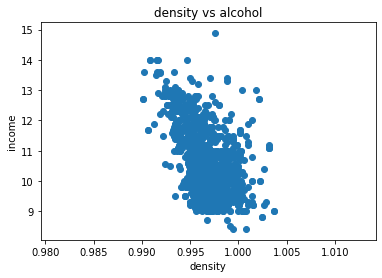

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X,Y)
plt.title('density vs alcohol')
plt.xlabel('density')
plt.ylabel('income')
plt.show()




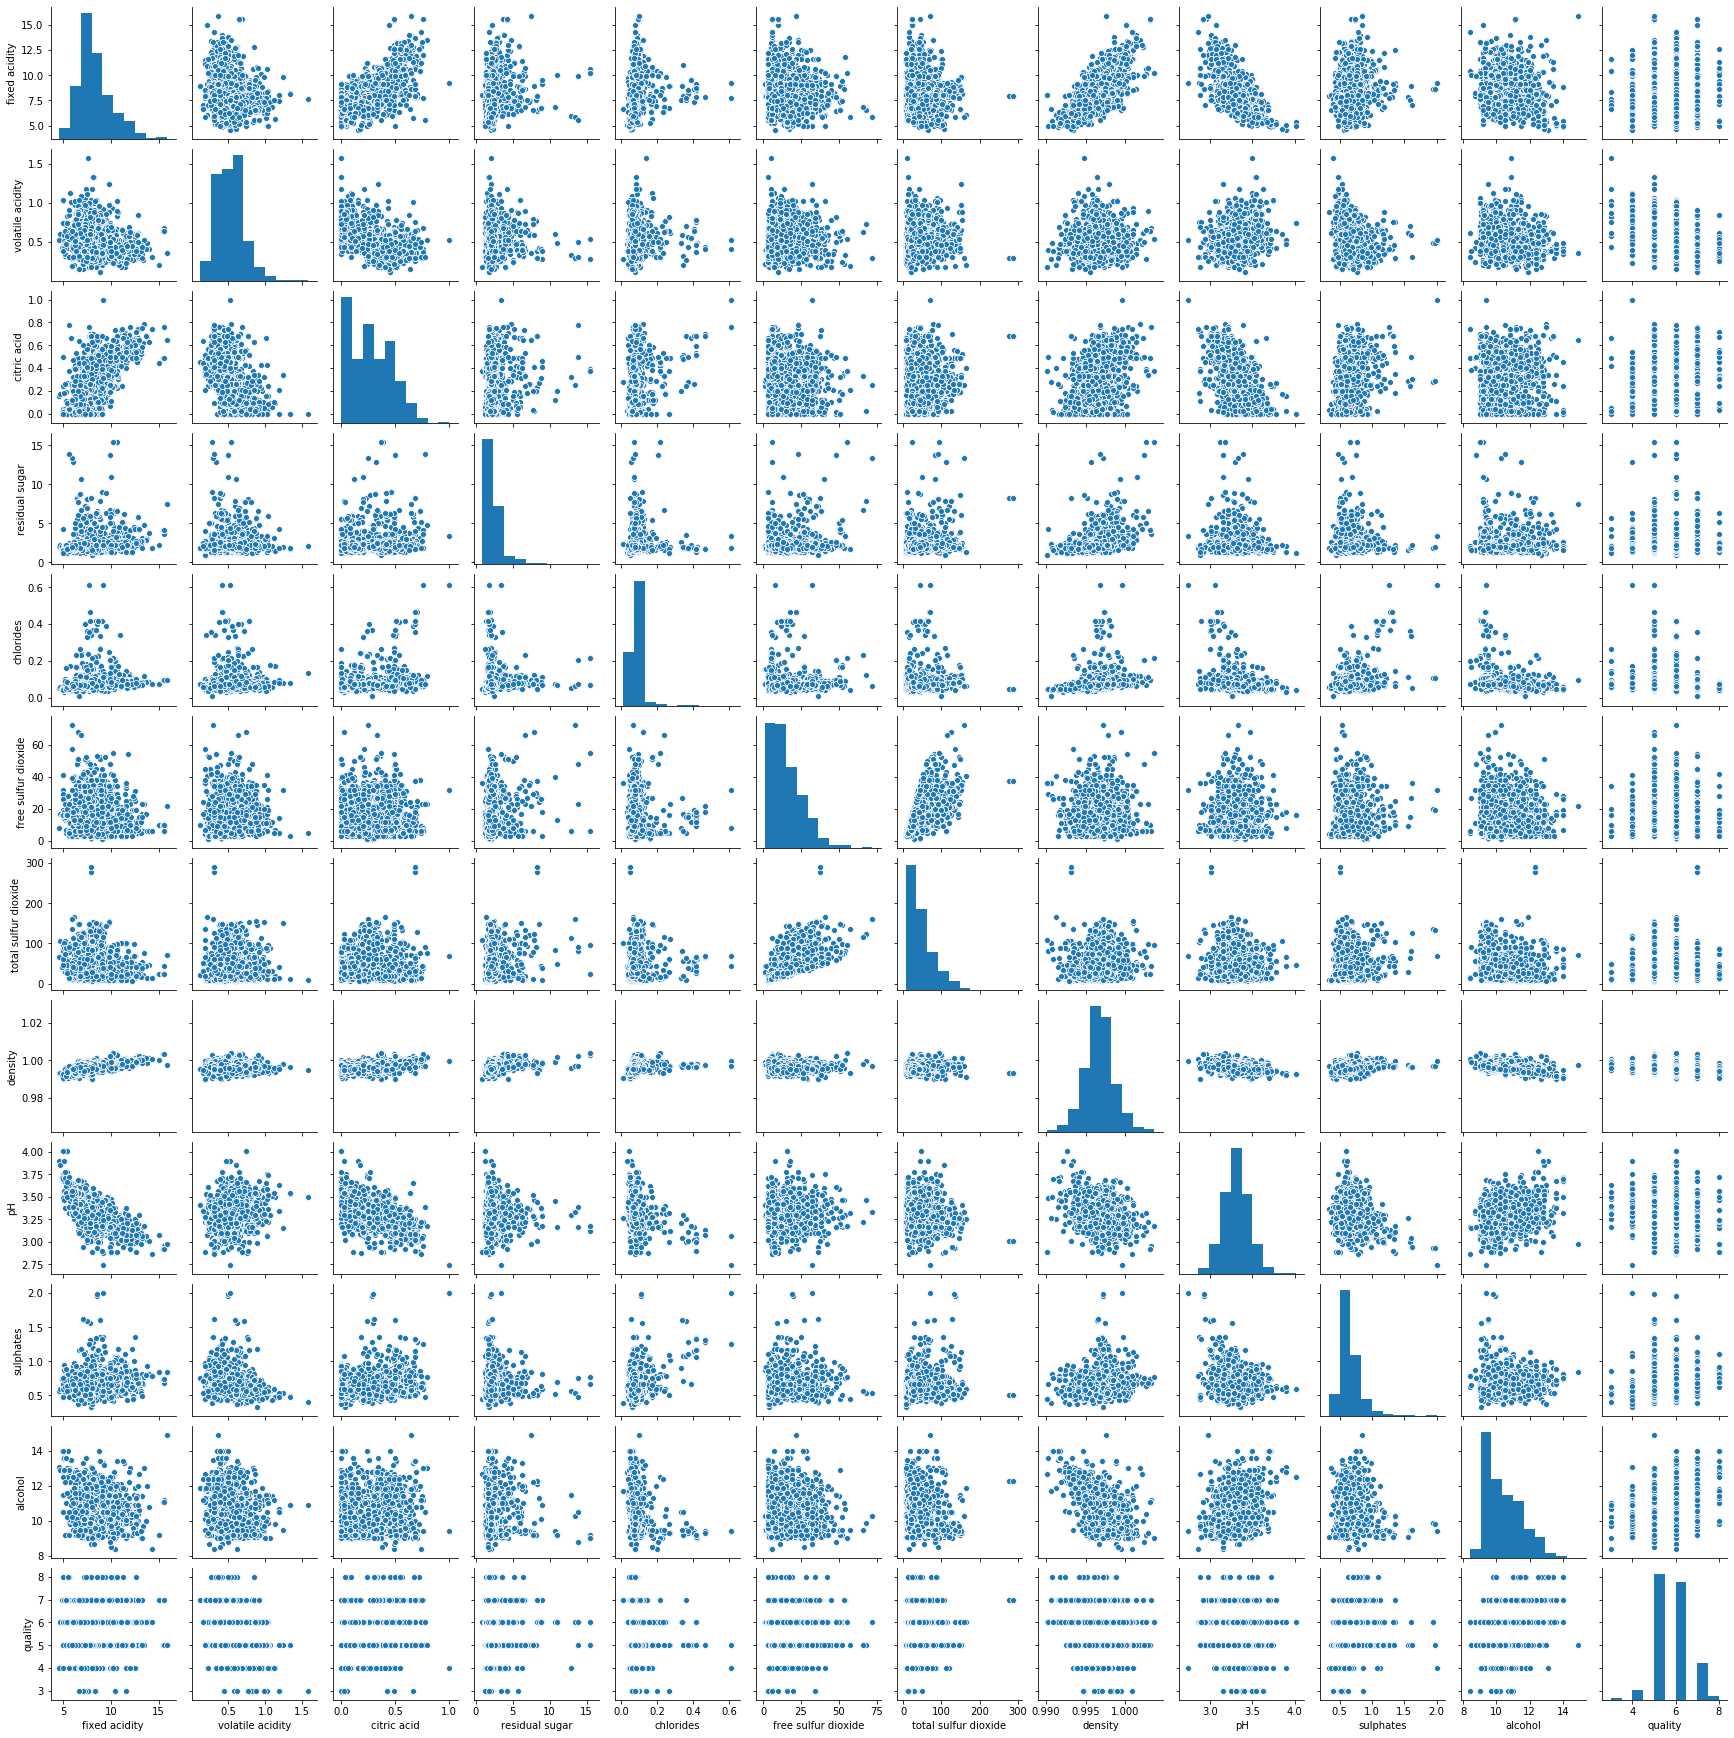

In [50]:
sns.pairplot(wine,height=2.0)
plt.show()

相関係数のチェック

In [51]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


テストデータの分割

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=0)

In [54]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1599, 1)
(1599, 1)
(1439, 1)
(1439, 1)
(160, 1)
(160, 1)


線形モデルの構築

線形モデルの学習

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.model_selection import learning_curve
ls = learning_curve(lr, X_train, Y_train)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

モデルの解釈

In [59]:
lr.intercept_

array([292.48700183])

In [60]:
lr.coef_

array([[-282.98820702]])

線形モデルの確認

線形モデルの可視化

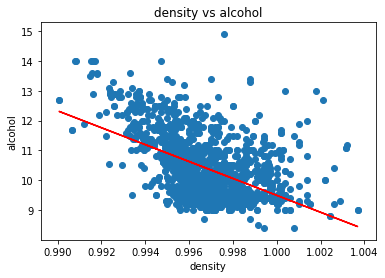

In [62]:
plt.plot(X_train, lr.predict(X_train), color = 'red')

plt.scatter(X_train, Y_train)
plt.title('density vs alcohol')
plt.xlabel('density')
plt.ylabel('alcohol')
plt.show()


回帰式の活用

In [63]:
density_1 = np.array([[1.000]])

lr.predict(density_1)

array([[9.4987948]])

モデルの評価

In [64]:
print('train: %.3f' % lr.score(X_train, Y_train))
print('test : %.3f' % lr.score(X_test, Y_test))

train: 0.250
test : 0.207


UC バークレー大学の UCI Machine Leaning Repository にて公開されている、「Wine Quality Data Set (ワインの品質)」の赤ワインのデータセットを用い、赤ワインはdensityが高いほどアルコール度数が高いという仮説を立て検証した。説明変数をdensity,目的変数をalcoholとおき、単回帰分析を実施した。 結果、densityが高いほどアルコール度数が低くなるという結果が出て、仮説と反対の結果が出た。アルコール（エタノール）の分子量46と比べて、赤ワインの成分（ブドウ果汁）の分子量が大きいことがこの結果の要因であると考えられる。また、相関係数が-0.496とそれほど高くないことから、この結果が妥当であるかと言うことについては、より多くのデータセットを持ってくるのが妥当であろうと考えられる。